# Lese inn data og tilpasse kurver

Her skal me sjå litt på korleis ein kan lesa inn data frå csv-filer og txt-filer. 
Me skal sjå på korleis me kan plotta datamaterialet, og korleis me kan tilpassa kurver til datamaterialet for å laga modellar. 

Startar med å importera bibliotek som me skal bruka:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Lese inn data med `pandas.read_csv`

Data som er oppgitt i tabellar kan me lesa inn i Python som _dataframes_ med Pandas.

Dette kan me gjera for **txt**-filer (rein tekst):

In [11]:
url = "https://raw.githubusercontent.com/lektorodd/1T/main/Demo%20-%20pandas%20og%20polyfit/kaffi-og-vatn.txt"
df_txt = pd.read_csv(url, sep = "\t")
df_txt

,Dag,Koppar kaffi,Glas vatn
0,1,2,3
1,2,4,2
2,3,6,6
3,4,1,3
4,5,2,3
5,6,0,4
6,7,1,2


Eller for **csv**-file (comma separated values):

In [14]:
url = "https://raw.githubusercontent.com/lektorodd/1T/main/Demo%20-%20pandas%20og%20polyfit/kaffi-og-vatn.csv"
df_csv = pd.read_csv(url)
df_csv

,Dag,Koppar kaffi,Glas vatn
0,1,2,3
1,2,4,2
2,3,6,6
3,4,1,3
4,5,2,3
5,6,0,4
6,7,1,2


:::{admonition} Merk
:class: important
Når det er noko anna enn komma som er skiljeteikn i csv- eller txt-fila vår må me oppgje kva det er. I det første eksempelet er det ein tabulator mellom kvar av kolonnene. Då gjer me `read_csv`-funksjonen argumentet `sep = "\t"`. På samme måte kan ein bruka `sep = ";"` dersom det er semikolon som er brukt som skiljeteikn. 
:::

## Plotte data med `matplotlib.pyplot`

plot(x, y)

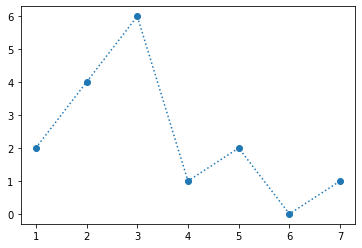

In [18]:
plt.plot(df["Dag"], df["Koppar kaffi"], "o:")

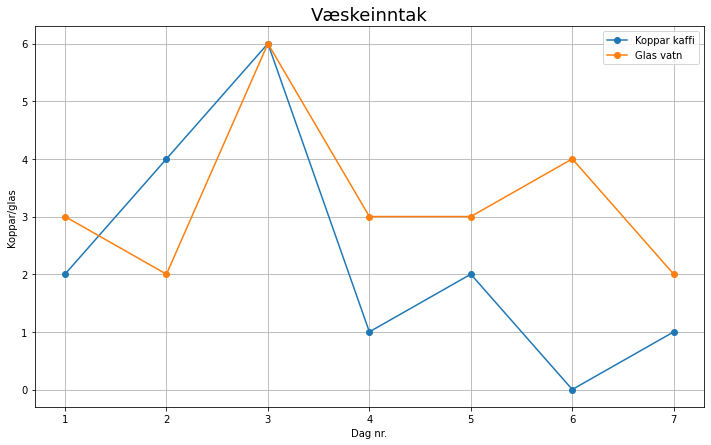

In [25]:
plt.figure(figsize = (12,7))
plt.plot(df["Dag"], df["Koppar kaffi"], "o-", label = "Koppar kaffi")
plt.plot(df["Dag"], df["Glas vatn"], "o-", label = "Glas vatn")
plt.legend()
plt.title("Væskeinntak", fontsize = 18)
plt.xlabel("Dag nr.")
plt.ylabel("Koppar/glas")
plt.grid()
plt.show()

## Kurvetilpassing med `numpy.polyfit`

## Lineær modell (polynom av første grad)
På forma 
$$ y = ax + b $$
Bruker `polyfit`som tar inn $x$-verdiar, $y$-verdiar og polynomgrad 1. 
Returnerer to verdiar, koeffisientane $a$ og $b$

y = -0.5357142857142863 x +  4.428571428571432


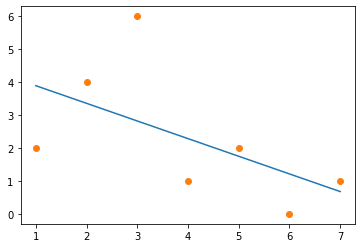

In [43]:
a1, b1 = np.polyfit(df["Dag"], df["Koppar kaffi"], 1)
print("y =", a1, "x + ", b1)

def lineær(x, a, b):
    return a*x + b

plt.plot(df["Dag"], lineær(df["Dag"], a1, b1))
plt.plot(df["Dag"], df["Koppar kaffi"], "o")

### Polynom av andre grad
På forma
$$ f(x) = ax^2 + bx + c $$
Bruker `polyfit`som tar inn $x$-verdiar, $y$-verdiar og polynomgrad 2. 
Returnerer tre verdiar, koeffisientane $a$, $b$ og $c$. 

f(x) = -0.16666666666666688 x^2 +  1.261904761904763 x + 1.5714285714285696


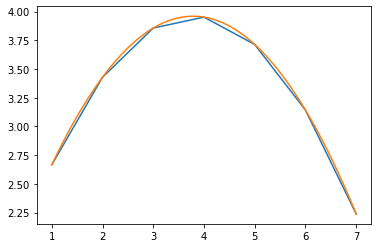

In [55]:
a, b, c = np.polyfit(df["Dag"], df["Glas vatn"], 2)
print("f(x) =", a, "x^2 + ", b, "x +", c)

def andregrad(x, a, b, c):
    return a*x**2 + b*x + c

plt.plot(df["Dag"], andregrad(df["Dag"], a, b, c)) # 7 x-verdiar

x = np.linspace(1,7,100)
plt.plot(x, andregrad(x, a, b, c)) # 100 x-verdiar

## Større døme

Med plotting av data og modellar til både kaffi og vatn

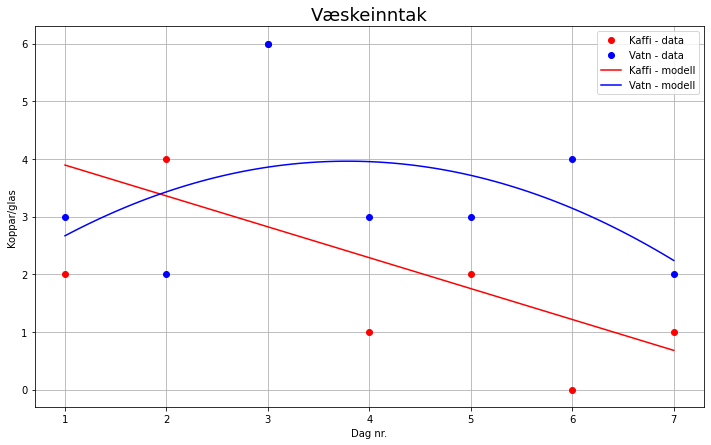

In [49]:
plt.figure(figsize = (12,7))

# data
plt.plot(df["Dag"], df["Koppar kaffi"], "o", label = "Kaffi - data", color = "red")
plt.plot(df["Dag"], df["Glas vatn"], "o", label = "Vatn - data", color = "blue")

# modell
plt.plot(x, lineær(x, a1, b1), label = "Kaffi - modell", color = "red")
plt.plot(x, andregrad(x, a, b, c), label = "Vatn - modell", color = "blue")

# pynting
plt.legend()
plt.title("Væskeinntak", fontsize = 18)
plt.xlabel("Dag nr.")
plt.ylabel("Koppar/glas")
plt.grid()
plt.show()